# Libraries

In [1]:
import pickle
import streamlit as st
from tensorflow.keras.models import load_model

from PIL import Image
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

2025-07-09 01:16:02.468455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Predicting on random: f26b02ead915.png
True Label: test_images/No_DR


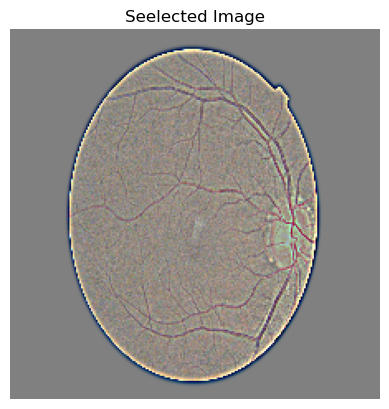

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Predicted Label: No_DR
Prediction is INCORRECT


In [2]:
# Loading the model
model = load_model("CNN_model.keras", compile=False)

# def preprocess_image(upload_file): 
#     image = image.open(upload_file).convert("RGB")
#     image = image.resize((224, 224))
#     image = np.array(image) / 255.0
#     image = np.expand_dims(image, axis=0)
#     return image

def predict_class_random_drom_dir(directory_path): 
    if not os.path.exists(directory_path):
        print(f"Error: Directory not found at {directory_path}")
        return 
    
    image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

    if not image_files:
        print(f" Error: No image files found in {directory_path}")
        return
    
    # Select randomlly an image 
    selected_image_file = random.choice(image_files)
    path = os.path.join(directory_path, selected_image_file)
    print(f"Predicting on random: {selected_image_file}")

    # True label is based on the folder name 
    true_class = os.path.join(directory_path)
    print(f"True Label: {true_class}")
    
    try:
        img = Image.open(path).convert("RGB")
    except Exception as e:
        print(f"Error in loading the image: {e}")
        return 
    
    # Processed image 
    img = img.resize((224, 224))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Seelected Image")
    plt.show()

    image_array = np.array(img) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Predict 
    prediction = model.predict(image_array)
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_class = "DR" if predicted_index == 0 else "No_DR"
    print(f"Predicted Label: {predicted_class}")

    # Compare
    if true_class == predicted_class:
        print("Prediction is CORRECT")
    else:
        print("Prediction is INCORRECT")

# Using on random images 
test_directories = ["test_images/DR", "test_images/No_DR"]
selected_directory = random.choice(test_directories)
predict_class_random_drom_dir(selected_directory)